In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("hasilprocesing.csv")

In [4]:
df

,track_id,track_name,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,umur
0,0tCqX7pASaZeHPC4FhAwe8,Brahms Lullaby,Sleepy Shepherd,0.390,0.01610,1,-29.263,1,0.0398,0.993000,0.67400,0.1330,0.500,143.848,47812,3,bayi
1,2DGSytzXs9oqYUy5tqxfSB,Twinkle Twinkle Little Star,Tommy Twinkle,0.550,0.06420,1,-24.304,1,0.1230,0.996000,0.95500,0.0951,0.791,84.369,103393,4,bayi
2,0KOOhxPmW5pfMXjgWzRf0j,Goodnight Little Dreamer,Little Dreamer,0.309,0.00781,2,-30.090,1,0.0557,0.996000,0.91600,0.0676,0.457,172.461,114046,4,bayi
3,4tbnZK9nKvuyCrqyu8o0eG,Hush Little Baby,Sleepy Shepherd,0.554,0.02040,11,-27.418,1,0.0528,0.995000,0.89700,0.0922,0.359,75.987,56769,4,bayi
4,5YMmjaZEzUoI8EFZm4q2fB,Moonlight Walk,Orion The Owl,0.479,0.01890,10,-24.228,1,0.0514,0.993000,0.95300,0.1210,0.287,78.055,134054,1,bayi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,3usbnvDFtOhY09cRNar8Zg,FRIENDS,LAUNDRY DAY,0.522,0.55400,5,-6.978,1,0.0290,0.490000,0.00001,0.1550,0.512,87.051,266472,4,dewasa
1236,2h4BV7jx9Ltz9NxC2zgNcW,"Now or Never (feat. Charlie Gillespie, Owen Pa...",Julie and the Phantoms Cast,0.449,0.95700,2,-3.797,1,0.0610,0.000197,0.00000,0.0242,0.785,175.954,184128,4,dewasa
1237,67BtfxlNbhBmCDR2L2l8qd,MONTERO (Call Me By Your Name),Lil Nas X,0.610,0.50800,8,-6.682,0,0.1520,0.297000,0.00000,0.3840,0.758,178.818,137876,4,dewasa
1238,7CBXta3Je26MMHOFGERplS,Miss The Rage - Remix,Toxic Tripz,0.514,0.65900,8,-7.903,1,0.0330,0.000011,0.31200,0.1390,0.181,104.028,175040,5,dewasa


## PROSES MENCARI JENIS SUASANA HATI DENGAN CLUSTERING

## calm/santai

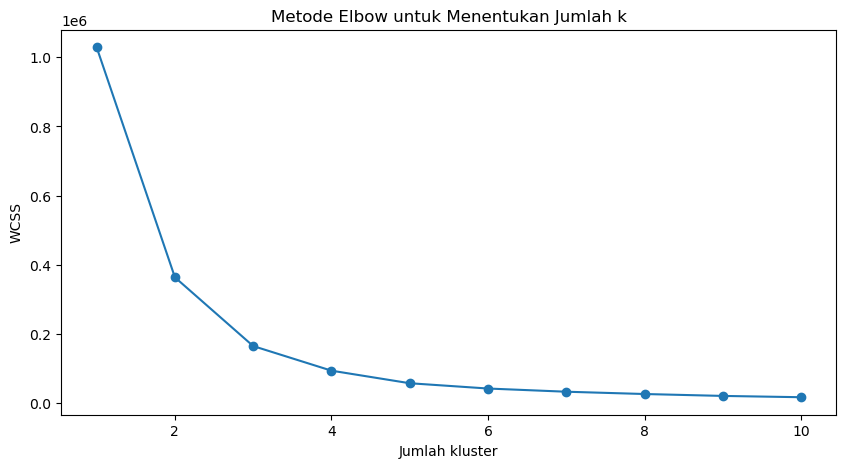

In [408]:
X = df[['instrumentalness', 'tempo']]

# Inisialisasi list untuk menyimpan nilai WCSS (Within-Cluster Sum of Square)
wcss = []

# Loop untuk menghitung nilai WCSS untuk jumlah kluster dari 1 hingga 10
for i in range(1, 11):  # Mencoba k dari 1 sampai 10
    # Membuat objek KMeans dengan jumlah kluster i
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    # Melakukan fitting KMeans pada data
    kmeans.fit(X)
    # Menambahkan nilai inersia (WCSS) untuk kluster i ke dalam list wcss
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah k')
plt.xlabel('Jumlah kluster')
plt.ylabel('WCSS')
plt.show()

C:\Users\wahyu\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Centroid dari setiap cluster:
Cluster 0: [ 0.25775213 75.72978607]
Cluster 1: [5.75333615e-02 1.39244371e+02]
Cluster 2: [7.12764920e-02 9.66571758e+01]
Cluster 3: [4.69693206e-02 1.71848603e+02]
Cluster 4: [8.47655913e-02 1.18055055e+02]


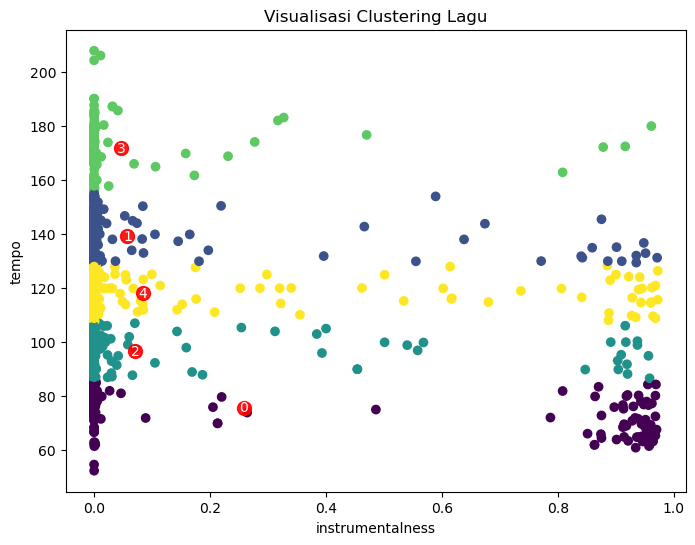

In [25]:
data = df

kmeans = KMeans(n_clusters=5)
df_clustered = df[['instrumentalness', 'tempo']]
kmeans.fit(df_clustered)

# Menampilkan centroid dari setiap cluster
centers = kmeans.cluster_centers_
print("Centroid dari setiap cluster:")
for i, center in enumerate(centers):
    print(f"Cluster {i}: {center}")
    
# Plot hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(df['instrumentalness'], df['tempo'], c=kmeans.labels_, cmap='viridis')

# Menandai pusat cluster dengan labelnya
for i, center in enumerate(centers):
    plt.scatter(center[0], center[1], c='red', s=100, alpha=0.9)  # Pusat cluster
    plt.text(center[0], center[1], str(i), color='white', ha='center', va='center') # Menambahkan label

# Label sumbu seharusnya sesuai dengan data yang digunakan untuk clustering
plt.title('Visualisasi Clustering Lagu')
plt.xlabel('instrumentalness')  # Sumbu X seharusnya 'energy'
plt.ylabel('tempo')  # Sumbu Y seharusnya 'valence'
plt.show()

In [30]:
from sklearn.metrics import silhouette_score

X = df_clustered  # Data yang sudah digunakan untuk clustering
labels = kmeans.labels_

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(X, labels)

print("Silhouette Coefficient: {:.3f}".format(silhouette_avg))

Silhouette Coefficient: 0.567


In [27]:
cluster_labels = kmeans.labels_
df['cluster'] = cluster_labels

In [32]:
df

,track_id,track_name,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,umur,cluster,calm
0,0tCqX7pASaZeHPC4FhAwe8,Brahms Lullaby,Sleepy Shepherd,0.390,0.01610,1,-29.263,1,0.0398,0.993000,0.67400,0.1330,0.500,143.848,47812,3,bayi,1,0
1,2DGSytzXs9oqYUy5tqxfSB,Twinkle Twinkle Little Star,Tommy Twinkle,0.550,0.06420,1,-24.304,1,0.1230,0.996000,0.95500,0.0951,0.791,84.369,103393,4,bayi,0,1
2,0KOOhxPmW5pfMXjgWzRf0j,Goodnight Little Dreamer,Little Dreamer,0.309,0.00781,2,-30.090,1,0.0557,0.996000,0.91600,0.0676,0.457,172.461,114046,4,bayi,3,0
3,4tbnZK9nKvuyCrqyu8o0eG,Hush Little Baby,Sleepy Shepherd,0.554,0.02040,11,-27.418,1,0.0528,0.995000,0.89700,0.0922,0.359,75.987,56769,4,bayi,0,1
4,5YMmjaZEzUoI8EFZm4q2fB,Moonlight Walk,Orion The Owl,0.479,0.01890,10,-24.228,1,0.0514,0.993000,0.95300,0.1210,0.287,78.055,134054,1,bayi,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,3usbnvDFtOhY09cRNar8Zg,FRIENDS,LAUNDRY DAY,0.522,0.55400,5,-6.978,1,0.0290,0.490000,0.00001,0.1550,0.512,87.051,266472,4,dewasa,2,0
1236,2h4BV7jx9Ltz9NxC2zgNcW,"Now or Never (feat. Charlie Gillespie, Owen Pa...",Julie and the Phantoms Cast,0.449,0.95700,2,-3.797,1,0.0610,0.000197,0.00000,0.0242,0.785,175.954,184128,4,dewasa,3,0
1237,67BtfxlNbhBmCDR2L2l8qd,MONTERO (Call Me By Your Name),Lil Nas X,0.610,0.50800,8,-6.682,0,0.1520,0.297000,0.00000,0.3840,0.758,178.818,137876,4,dewasa,3,0
1238,7CBXta3Je26MMHOFGERplS,Miss The Rage - Remix,Toxic Tripz,0.514,0.65900,8,-7.903,1,0.0330,0.000011,0.31200,0.1390,0.181,104.028,175040,5,dewasa,2,0


In [31]:
# Menandai baris yang merupakan bagian dari cluster 0 dengan 1, yang lain dengan 0
df['calm'] = df['cluster'].apply(lambda x: 1 if x == 0 else 0)

In [29]:
df.to_excel(r'testcalmm.xlsx', index=False)

In [35]:
df

,track_id,track_name,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,umur,calm
0,0tCqX7pASaZeHPC4FhAwe8,Brahms Lullaby,Sleepy Shepherd,0.390,0.01610,1,-29.263,1,0.0398,0.993000,0.67400,0.1330,0.500,143.848,47812,3,bayi,0
1,2DGSytzXs9oqYUy5tqxfSB,Twinkle Twinkle Little Star,Tommy Twinkle,0.550,0.06420,1,-24.304,1,0.1230,0.996000,0.95500,0.0951,0.791,84.369,103393,4,bayi,1
2,0KOOhxPmW5pfMXjgWzRf0j,Goodnight Little Dreamer,Little Dreamer,0.309,0.00781,2,-30.090,1,0.0557,0.996000,0.91600,0.0676,0.457,172.461,114046,4,bayi,0
3,4tbnZK9nKvuyCrqyu8o0eG,Hush Little Baby,Sleepy Shepherd,0.554,0.02040,11,-27.418,1,0.0528,0.995000,0.89700,0.0922,0.359,75.987,56769,4,bayi,1
4,5YMmjaZEzUoI8EFZm4q2fB,Moonlight Walk,Orion The Owl,0.479,0.01890,10,-24.228,1,0.0514,0.993000,0.95300,0.1210,0.287,78.055,134054,1,bayi,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,3usbnvDFtOhY09cRNar8Zg,FRIENDS,LAUNDRY DAY,0.522,0.55400,5,-6.978,1,0.0290,0.490000,0.00001,0.1550,0.512,87.051,266472,4,dewasa,0
1236,2h4BV7jx9Ltz9NxC2zgNcW,"Now or Never (feat. Charlie Gillespie, Owen Pa...",Julie and the Phantoms Cast,0.449,0.95700,2,-3.797,1,0.0610,0.000197,0.00000,0.0242,0.785,175.954,184128,4,dewasa,0
1237,67BtfxlNbhBmCDR2L2l8qd,MONTERO (Call Me By Your Name),Lil Nas X,0.610,0.50800,8,-6.682,0,0.1520,0.297000,0.00000,0.3840,0.758,178.818,137876,4,dewasa,0
1238,7CBXta3Je26MMHOFGERplS,Miss The Rage - Remix,Toxic Tripz,0.514,0.65900,8,-7.903,1,0.0330,0.000011,0.31200,0.1390,0.181,104.028,175040,5,dewasa,0


In [34]:
df = df.drop(['cluster'], axis=1)

## energetic/semangat

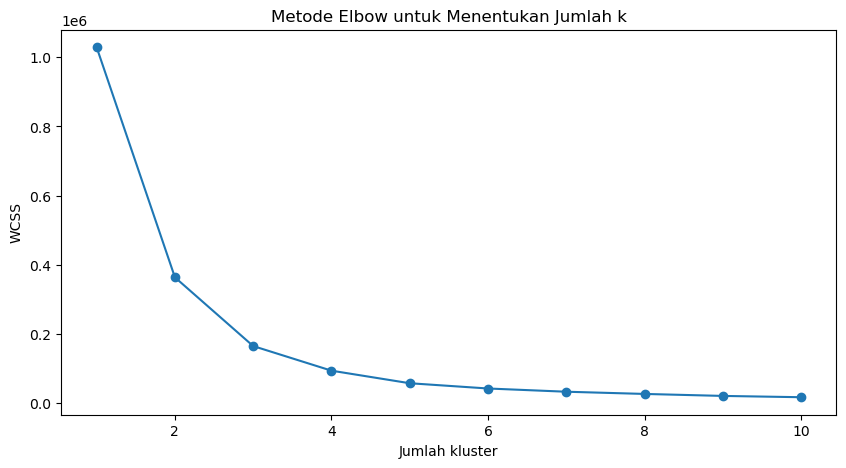

In [70]:
X = df[['danceability', 'tempo']]

wcss = []
for i in range(1, 11):  # Mencoba k dari 1 sampai 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah k')
plt.xlabel('Jumlah kluster')
plt.ylabel('WCSS')
plt.show()

C:\Users\wahyu\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Centroid dari setiap cluster:
Cluster 0: [  0.68155208 118.83366667]
Cluster 1: [ 0.54900662 80.73256291]
Cluster 2: [  0.46469811 181.22833962]
Cluster 3: [  0.60418548 138.39852419]
Cluster 4: [  0.64629114 108.23678481]
Cluster 5: [ 0.63061236 95.08496629]
Cluster 6: [ 0.46613043 67.90133333]
Cluster 7: [  0.57551064 148.3085    ]
Cluster 8: [  0.66128105 128.46312418]
Cluster 9: [  0.54916176 165.68125   ]


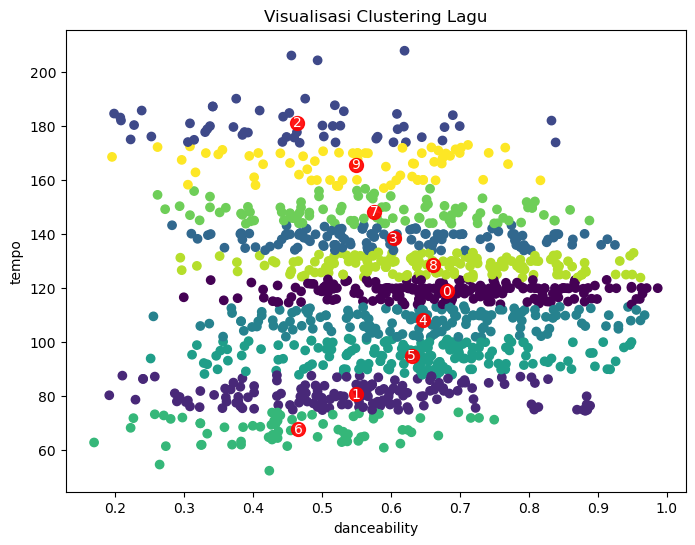

In [120]:
data = df

kmeans = KMeans(n_clusters=10)
df_clustered = df[['danceability', 'tempo']]
kmeans.fit(df_clustered)

# Menampilkan centroid dari setiap cluster
centers = kmeans.cluster_centers_
print("Centroid dari setiap cluster:")
for i, center in enumerate(centers):
    print(f"Cluster {i}: {center}")

# Plot hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(df['danceability'], df['tempo'], c=kmeans.labels_, cmap='viridis')

# Menandai pusat cluster dengan labelnya
for i, center in enumerate(centers):
    plt.scatter(center[0], center[1], c='red', s=100, alpha=0.9)  # Pusat cluster
    plt.text(center[0], center[1], str(i), color='white', ha='center', va='center') # Menambahkan label

# Label sumbu seharusnya sesuai dengan data yang digunakan untuk clustering
plt.title('Visualisasi Clustering Lagu')
plt.xlabel('danceability')  # Sumbu X seharusnya 'energy'
plt.ylabel('tempo')  # Sumbu Y seharusnya 'valence'
plt.show()

In [121]:
from sklearn.metrics import silhouette_score

X = df_clustered  # Data yang sudah digunakan untuk clustering
labels = kmeans.labels_

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(X, labels)

print("Silhouette Coefficient: {:.3f}".format(silhouette_avg))

Silhouette Coefficient: 0.547


In [125]:
# Ekstrak label cluster
cluster_labels = kmeans.labels_

# Menambahkan label cluster ke DataFrame
df['cluster'] = cluster_labels

In [126]:
df.to_excel(r'testegiddc.xlsx', index=False)

In [128]:
df['energic'] = df['cluster'].apply(lambda x: 1 if x == 9 else 0)

In [132]:
df = df.drop(['cluster'], axis=1)

In [133]:
df

,track_id,track_name,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,umur,calm,energic
0,0tCqX7pASaZeHPC4FhAwe8,Brahms Lullaby,Sleepy Shepherd,0.390,0.01610,1,-29.263,1,0.0398,0.993000,0.67400,0.1330,0.500,143.848,47812,3,bayi,0,0
1,2DGSytzXs9oqYUy5tqxfSB,Twinkle Twinkle Little Star,Tommy Twinkle,0.550,0.06420,1,-24.304,1,0.1230,0.996000,0.95500,0.0951,0.791,84.369,103393,4,bayi,1,0
2,0KOOhxPmW5pfMXjgWzRf0j,Goodnight Little Dreamer,Little Dreamer,0.309,0.00781,2,-30.090,1,0.0557,0.996000,0.91600,0.0676,0.457,172.461,114046,4,bayi,0,1
3,4tbnZK9nKvuyCrqyu8o0eG,Hush Little Baby,Sleepy Shepherd,0.554,0.02040,11,-27.418,1,0.0528,0.995000,0.89700,0.0922,0.359,75.987,56769,4,bayi,1,0
4,5YMmjaZEzUoI8EFZm4q2fB,Moonlight Walk,Orion The Owl,0.479,0.01890,10,-24.228,1,0.0514,0.993000,0.95300,0.1210,0.287,78.055,134054,1,bayi,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,3usbnvDFtOhY09cRNar8Zg,FRIENDS,LAUNDRY DAY,0.522,0.55400,5,-6.978,1,0.0290,0.490000,0.00001,0.1550,0.512,87.051,266472,4,dewasa,0,0
1236,2h4BV7jx9Ltz9NxC2zgNcW,"Now or Never (feat. Charlie Gillespie, Owen Pa...",Julie and the Phantoms Cast,0.449,0.95700,2,-3.797,1,0.0610,0.000197,0.00000,0.0242,0.785,175.954,184128,4,dewasa,0,0
1237,67BtfxlNbhBmCDR2L2l8qd,MONTERO (Call Me By Your Name),Lil Nas X,0.610,0.50800,8,-6.682,0,0.1520,0.297000,0.00000,0.3840,0.758,178.818,137876,4,dewasa,0,0
1238,7CBXta3Je26MMHOFGERplS,Miss The Rage - Remix,Toxic Tripz,0.514,0.65900,8,-7.903,1,0.0330,0.000011,0.31200,0.1390,0.181,104.028,175040,5,dewasa,0,0


## SAD/ SEDIH

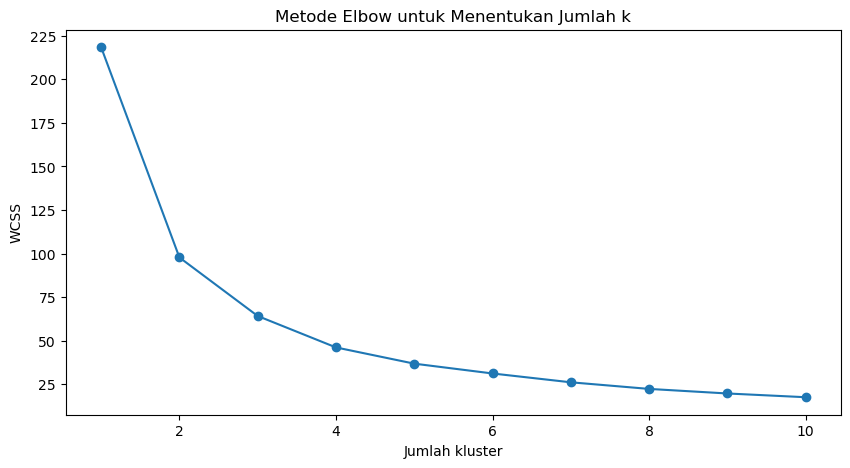

In [202]:
X = df[['acousticness', 'valence']]

wcss = []
for i in range(1, 11):  # Mencoba k dari 1 sampai 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah k')
plt.xlabel('Jumlah kluster')
plt.ylabel('WCSS')
plt.show()

C:\Users\wahyu\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Centroid dari setiap cluster:
Cluster 0: [0.15746902 0.35335049]
Cluster 1: [0.83434492 0.3452869 ]
Cluster 2: [0.59731163 0.74802791]
Cluster 3: [0.13793179 0.77388663]


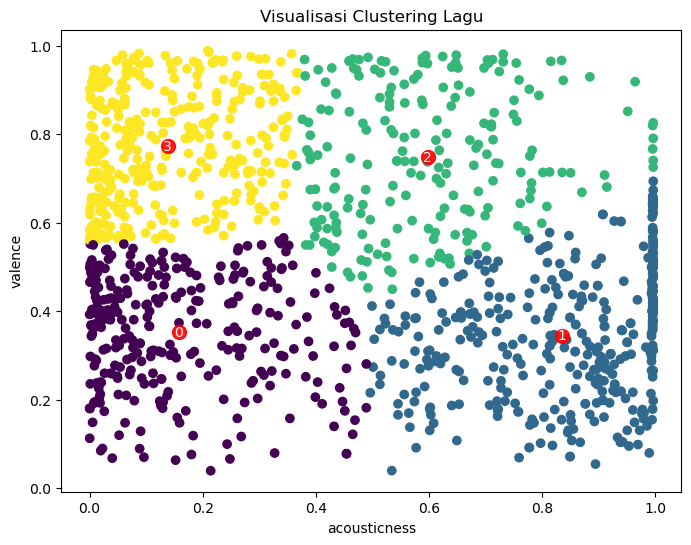

In [211]:
data = df

kmeans = KMeans(n_clusters=4)
df_clustered = df[['acousticness', 'valence']]
kmeans.fit(df_clustered)
 
centers = kmeans.cluster_centers_
print("Centroid dari setiap cluster:")
for i, center in enumerate(centers):
    print(f"Cluster {i}: {center}")
 
plt.figure(figsize=(8, 6))
plt.scatter(df['acousticness'], df['valence'], c=kmeans.labels_, cmap='viridis')
 
for i, center in enumerate(centers):
    plt.scatter(center[0], center[1], c='red', s=100, alpha=0.9) 
    plt.text(center[0], center[1], str(i), color='white', ha='center', va='center') 
 
plt.title('Visualisasi Clustering Lagu')
plt.xlabel('acousticness') 
plt.ylabel('valence') 
plt.show()

In [213]:
from sklearn.metrics import silhouette_score

X = df_clustered  # Data yang sudah digunakan untuk clustering
labels = kmeans.labels_

silhouette_avg = silhouette_score(X, labels)

print("Silhouette Coefficient: {:.3f}".format(silhouette_avg))

Silhouette Coefficient: 0.431


In [216]:
cluster_labels = kmeans.labels_
df['cluster'] = cluster_labels

In [219]:
df.to_excel(r'testtssadd.xlsx', index=False)

In [220]:
df['sad'] = df['cluster'].apply(lambda x: 1 if x == 1 else 0)

In [222]:
df = df.drop(['cluster'], axis=1)

In [249]:
df

,track_id,track_name,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,umur,calm,energic,sad
0,0tCqX7pASaZeHPC4FhAwe8,Brahms Lullaby,Sleepy Shepherd,0.390,0.01610,1,-29.263,1,0.0398,0.993000,0.67400,0.1330,0.500,143.848,47812,3,bayi,0,0,1
1,2DGSytzXs9oqYUy5tqxfSB,Twinkle Twinkle Little Star,Tommy Twinkle,0.550,0.06420,1,-24.304,1,0.1230,0.996000,0.95500,0.0951,0.791,84.369,103393,4,bayi,1,0,0
2,0KOOhxPmW5pfMXjgWzRf0j,Goodnight Little Dreamer,Little Dreamer,0.309,0.00781,2,-30.090,1,0.0557,0.996000,0.91600,0.0676,0.457,172.461,114046,4,bayi,0,1,1
3,4tbnZK9nKvuyCrqyu8o0eG,Hush Little Baby,Sleepy Shepherd,0.554,0.02040,11,-27.418,1,0.0528,0.995000,0.89700,0.0922,0.359,75.987,56769,4,bayi,1,0,1
4,5YMmjaZEzUoI8EFZm4q2fB,Moonlight Walk,Orion The Owl,0.479,0.01890,10,-24.228,1,0.0514,0.993000,0.95300,0.1210,0.287,78.055,134054,1,bayi,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,3usbnvDFtOhY09cRNar8Zg,FRIENDS,LAUNDRY DAY,0.522,0.55400,5,-6.978,1,0.0290,0.490000,0.00001,0.1550,0.512,87.051,266472,4,dewasa,0,0,0
1236,2h4BV7jx9Ltz9NxC2zgNcW,"Now or Never (feat. Charlie Gillespie, Owen Pa...",Julie and the Phantoms Cast,0.449,0.95700,2,-3.797,1,0.0610,0.000197,0.00000,0.0242,0.785,175.954,184128,4,dewasa,0,0,0
1237,67BtfxlNbhBmCDR2L2l8qd,MONTERO (Call Me By Your Name),Lil Nas X,0.610,0.50800,8,-6.682,0,0.1520,0.297000,0.00000,0.3840,0.758,178.818,137876,4,dewasa,0,0,0
1238,7CBXta3Je26MMHOFGERplS,Miss The Rage - Remix,Toxic Tripz,0.514,0.65900,8,-7.903,1,0.0330,0.000011,0.31200,0.1390,0.181,104.028,175040,5,dewasa,0,0,0


## happy/senang

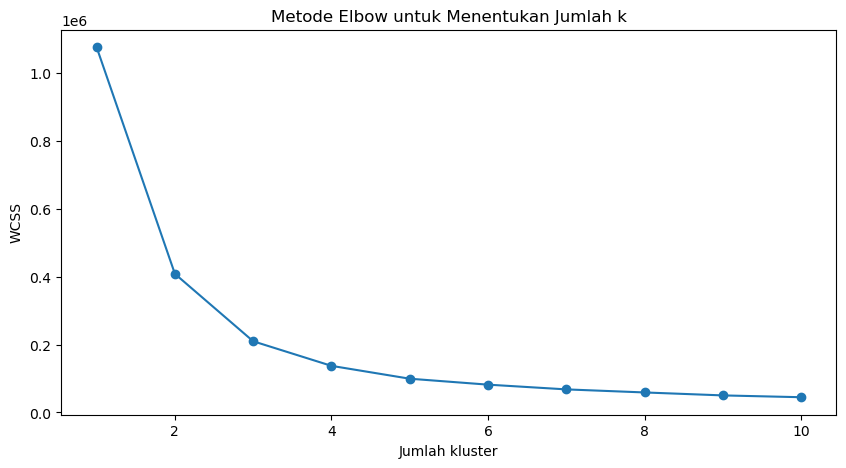

In [371]:
X = df[['loudness', 'tempo']]

wcss = []
for i in range(1, 11):  # Mencoba k dari 1 sampai 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah k')
plt.xlabel('Jumlah kluster')
plt.ylabel('WCSS')
plt.show()

C:\Users\wahyu\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Centroid dari setiap cluster:
Cluster 0: [ -8.53376094 123.1222963 ]
Cluster 1: [-11.44148826  86.11347653]
Cluster 2: [ -7.93719545 161.49147727]


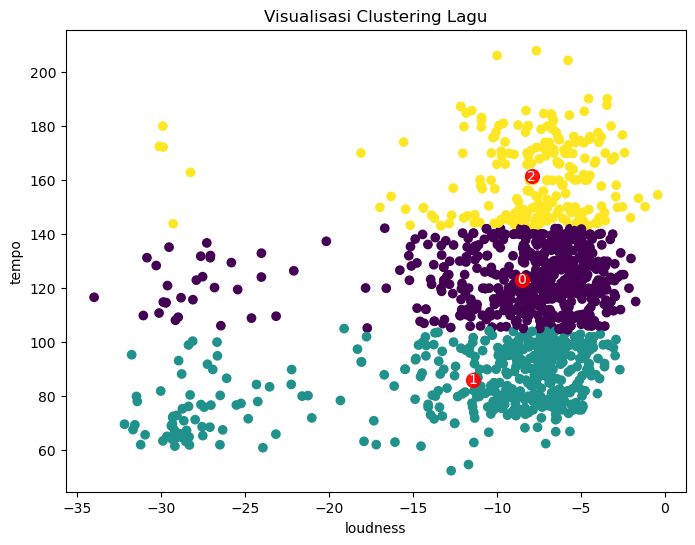

In [383]:
data = df

kmeans = KMeans(n_clusters=3)
df_clustered = df[['loudness', 'tempo']]
kmeans.fit(df_clustered)

# Menampilkan centroid dari setiap cluster
centers = kmeans.cluster_centers_
print("Centroid dari setiap cluster:")
for i, center in enumerate(centers):
    print(f"Cluster {i}: {center}")

# Plot hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(df['loudness'], df['tempo'], c=kmeans.labels_, cmap='viridis')

# Menandai pusat cluster dengan labelnya
for i, center in enumerate(centers):
    plt.scatter(center[0], center[1], c='red', s=100, alpha=0.9)  # Pusat cluster
    plt.text(center[0], center[1], str(i), color='white', ha='center', va='center') # Menambahkan label

# Label sumbu seharusnya sesuai dengan data yang digunakan untuk clustering
plt.title('Visualisasi Clustering Lagu')
plt.xlabel('loudness')  # Sumbu X seharusnya 'energy'
plt.ylabel('tempo')  # Sumbu Y seharusnya 'valence'
plt.show()

In [384]:
from sklearn.metrics import silhouette_score

X = df_clustered
labels = kmeans.labels_

silhouette_avg = silhouette_score(X, labels)
print("Silhouette Coefficient: {:.3f}".format(silhouette_avg))

Silhouette Coefficient: 0.514


In [385]:
# Ekstrak label cluster
cluster_labels = kmeans.labels_

# Menambahkan label cluster ke DataFrame
df['cluster'] = cluster_labels

In [270]:
df.to_excel(r'testthappyy.xlsx', index=False)

In [386]:
df 

,track_id,track_name,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,umur,calm,energic,sad,cluster
0,0tCqX7pASaZeHPC4FhAwe8,Brahms Lullaby,Sleepy Shepherd,0.390,0.01610,1,-29.263,1,0.0398,0.993000,...,0.1330,0.500,143.848,47812,3,bayi,0,0,1,2
1,2DGSytzXs9oqYUy5tqxfSB,Twinkle Twinkle Little Star,Tommy Twinkle,0.550,0.06420,1,-24.304,1,0.1230,0.996000,...,0.0951,0.791,84.369,103393,4,bayi,1,0,0,1
2,0KOOhxPmW5pfMXjgWzRf0j,Goodnight Little Dreamer,Little Dreamer,0.309,0.00781,2,-30.090,1,0.0557,0.996000,...,0.0676,0.457,172.461,114046,4,bayi,0,1,1,2
3,4tbnZK9nKvuyCrqyu8o0eG,Hush Little Baby,Sleepy Shepherd,0.554,0.02040,11,-27.418,1,0.0528,0.995000,...,0.0922,0.359,75.987,56769,4,bayi,1,0,1,1
4,5YMmjaZEzUoI8EFZm4q2fB,Moonlight Walk,Orion The Owl,0.479,0.01890,10,-24.228,1,0.0514,0.993000,...,0.1210,0.287,78.055,134054,1,bayi,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,3usbnvDFtOhY09cRNar8Zg,FRIENDS,LAUNDRY DAY,0.522,0.55400,5,-6.978,1,0.0290,0.490000,...,0.1550,0.512,87.051,266472,4,dewasa,0,0,0,1
1236,2h4BV7jx9Ltz9NxC2zgNcW,"Now or Never (feat. Charlie Gillespie, Owen Pa...",Julie and the Phantoms Cast,0.449,0.95700,2,-3.797,1,0.0610,0.000197,...,0.0242,0.785,175.954,184128,4,dewasa,0,0,0,2
1237,67BtfxlNbhBmCDR2L2l8qd,MONTERO (Call Me By Your Name),Lil Nas X,0.610,0.50800,8,-6.682,0,0.1520,0.297000,...,0.3840,0.758,178.818,137876,4,dewasa,0,0,0,2
1238,7CBXta3Je26MMHOFGERplS,Miss The Rage - Remix,Toxic Tripz,0.514,0.65900,8,-7.903,1,0.0330,0.000011,...,0.1390,0.181,104.028,175040,5,dewasa,0,0,0,1


In [387]:
# Menandai baris yang merupakan bagian dari cluster 0 dengan 1, yang lain dengan 0
df['happy'] = df['cluster'].apply(lambda x: 1 if x == 2 else 0)

In [389]:
df = df.drop(['cluster'], axis=1)

In [390]:
df

,track_id,track_name,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,umur,calm,energic,sad,happy
0,0tCqX7pASaZeHPC4FhAwe8,Brahms Lullaby,Sleepy Shepherd,0.390,0.01610,1,-29.263,1,0.0398,0.993000,...,0.1330,0.500,143.848,47812,3,bayi,0,0,1,1
1,2DGSytzXs9oqYUy5tqxfSB,Twinkle Twinkle Little Star,Tommy Twinkle,0.550,0.06420,1,-24.304,1,0.1230,0.996000,...,0.0951,0.791,84.369,103393,4,bayi,1,0,0,0
2,0KOOhxPmW5pfMXjgWzRf0j,Goodnight Little Dreamer,Little Dreamer,0.309,0.00781,2,-30.090,1,0.0557,0.996000,...,0.0676,0.457,172.461,114046,4,bayi,0,1,1,1
3,4tbnZK9nKvuyCrqyu8o0eG,Hush Little Baby,Sleepy Shepherd,0.554,0.02040,11,-27.418,1,0.0528,0.995000,...,0.0922,0.359,75.987,56769,4,bayi,1,0,1,0
4,5YMmjaZEzUoI8EFZm4q2fB,Moonlight Walk,Orion The Owl,0.479,0.01890,10,-24.228,1,0.0514,0.993000,...,0.1210,0.287,78.055,134054,1,bayi,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,3usbnvDFtOhY09cRNar8Zg,FRIENDS,LAUNDRY DAY,0.522,0.55400,5,-6.978,1,0.0290,0.490000,...,0.1550,0.512,87.051,266472,4,dewasa,0,0,0,0
1236,2h4BV7jx9Ltz9NxC2zgNcW,"Now or Never (feat. Charlie Gillespie, Owen Pa...",Julie and the Phantoms Cast,0.449,0.95700,2,-3.797,1,0.0610,0.000197,...,0.0242,0.785,175.954,184128,4,dewasa,0,0,0,1
1237,67BtfxlNbhBmCDR2L2l8qd,MONTERO (Call Me By Your Name),Lil Nas X,0.610,0.50800,8,-6.682,0,0.1520,0.297000,...,0.3840,0.758,178.818,137876,4,dewasa,0,0,0,1
1238,7CBXta3Je26MMHOFGERplS,Miss The Rage - Remix,Toxic Tripz,0.514,0.65900,8,-7.903,1,0.0330,0.000011,...,0.1390,0.181,104.028,175040,5,dewasa,0,0,0,0


In [46]:
df.to_csv(r'finaldataset.csv', index=False)

## MENCARI SUASANA HATI ANGRY/MARAH

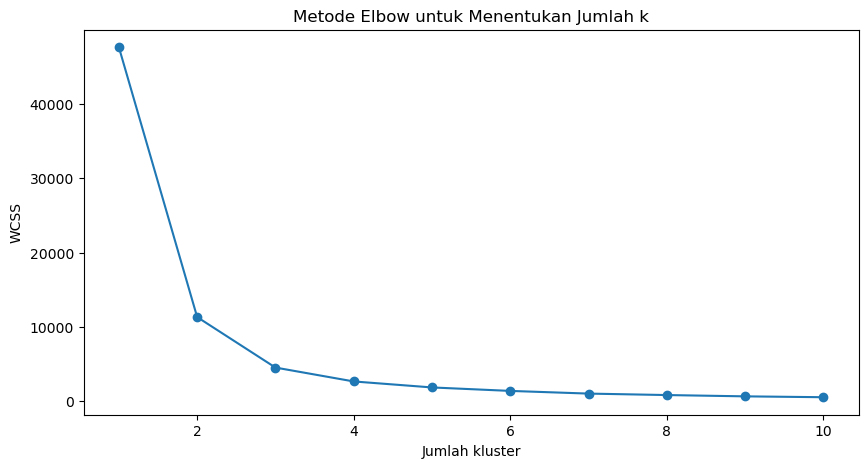

In [391]:
X = df[['energy', 'loudness']]

wcss = []
for i in range(1, 11):  # Mencoba k dari 1 sampai 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah k')
plt.xlabel('Jumlah kluster')
plt.ylabel('WCSS')
plt.show()

C:\Users\wahyu\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Centroid dari setiap cluster:
Cluster 0: [ 0.73207467 -4.799608  ]
Cluster 1: [  0.41012446 -10.59043348]
Cluster 2: [ 2.02606250e-02 -2.79350521e+01]
Cluster 3: [ 0.56387045 -7.52159773]
Cluster 4: [  0.29484875 -14.90228125]


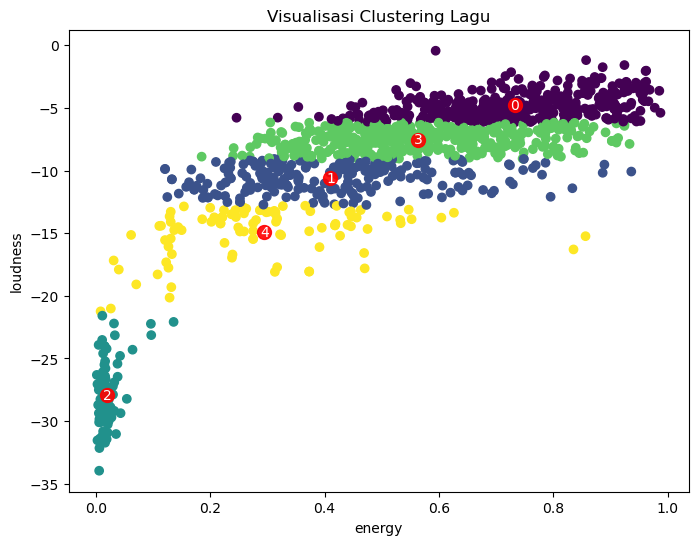

In [392]:
data = df

kmeans = KMeans(n_clusters=5)
df_clustered = df[['energy', 'loudness']]
kmeans.fit(df_clustered)

# Menampilkan centroid dari setiap cluster
centers = kmeans.cluster_centers_
print("Centroid dari setiap cluster:")
for i, center in enumerate(centers):
    print(f"Cluster {i}: {center}")

# Plot hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(df['energy'], df['loudness'], c=kmeans.labels_, cmap='viridis')

# Menandai pusat cluster dengan labelnya
for i, center in enumerate(centers):
    plt.scatter(center[0], center[1], c='red', s=100, alpha=0.9)  # Pusat cluster
    plt.text(center[0], center[1], str(i), color='white', ha='center', va='center') # Menambahkan label

# Label sumbu seharusnya sesuai dengan data yang digunakan untuk clustering
plt.title('Visualisasi Clustering Lagu')
plt.xlabel('energy')  # Sumbu X seharusnya 'energy'
plt.ylabel('loudness')  # Sumbu Y seharusnya 'valence'
plt.show()

In [393]:
from sklearn.metrics import silhouette_score

X = df_clustered
labels = kmeans.labels_

silhouette_avg = silhouette_score(X, labels)
print("Silhouette Coefficient: {:.3f}".format(silhouette_avg))

Silhouette Coefficient: 0.544


In [395]:
# Ekstrak label cluster
cluster_labels = kmeans.labels_

# Menambahkan label cluster ke DataFrame
df['cluster'] = cluster_labels

In [399]:
df = df.drop(['cluster'], axis=1)

In [ ]:
# Menandai baris yang merupakan bagian dari cluster 0 dengan 1, yang lain dengan 0
df['angry'] = df['cluster'].apply(lambda x: 1 if x == 0 else 0)

In [401]:
df.to_excel(r'revisihasilfinal.xlsx', index=False)

In [406]:
df 

,track_id,track_name,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,duration_ms,time_signature,umur,calm,energic,sad,happy,angry
0,0tCqX7pASaZeHPC4FhAwe8,Brahms Lullaby,Sleepy Shepherd,0.390,0.01610,1,-29.263,1,0.0398,0.993000,...,0.500,143.848,47812,3,bayi,0,0,1,1,0
1,2DGSytzXs9oqYUy5tqxfSB,Twinkle Twinkle Little Star,Tommy Twinkle,0.550,0.06420,1,-24.304,1,0.1230,0.996000,...,0.791,84.369,103393,4,bayi,1,0,0,0,0
2,0KOOhxPmW5pfMXjgWzRf0j,Goodnight Little Dreamer,Little Dreamer,0.309,0.00781,2,-30.090,1,0.0557,0.996000,...,0.457,172.461,114046,4,bayi,0,1,1,1,0
3,4tbnZK9nKvuyCrqyu8o0eG,Hush Little Baby,Sleepy Shepherd,0.554,0.02040,11,-27.418,1,0.0528,0.995000,...,0.359,75.987,56769,4,bayi,1,0,1,0,0
4,5YMmjaZEzUoI8EFZm4q2fB,Moonlight Walk,Orion The Owl,0.479,0.01890,10,-24.228,1,0.0514,0.993000,...,0.287,78.055,134054,1,bayi,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,3usbnvDFtOhY09cRNar8Zg,FRIENDS,LAUNDRY DAY,0.522,0.55400,5,-6.978,1,0.0290,0.490000,...,0.512,87.051,266472,4,dewasa,0,0,0,0,0
1236,2h4BV7jx9Ltz9NxC2zgNcW,"Now or Never (feat. Charlie Gillespie, Owen Pa...",Julie and the Phantoms Cast,0.449,0.95700,2,-3.797,1,0.0610,0.000197,...,0.785,175.954,184128,4,dewasa,0,0,0,1,1
1237,67BtfxlNbhBmCDR2L2l8qd,MONTERO (Call Me By Your Name),Lil Nas X,0.610,0.50800,8,-6.682,0,0.1520,0.297000,...,0.758,178.818,137876,4,dewasa,0,0,0,1,0
1238,7CBXta3Je26MMHOFGERplS,Miss The Rage - Remix,Toxic Tripz,0.514,0.65900,8,-7.903,1,0.0330,0.000011,...,0.181,104.028,175040,5,dewasa,0,0,0,0,0


In [407]:
df.to_csv('HasilClusterRevisi.csv', index=False)

## plot lain

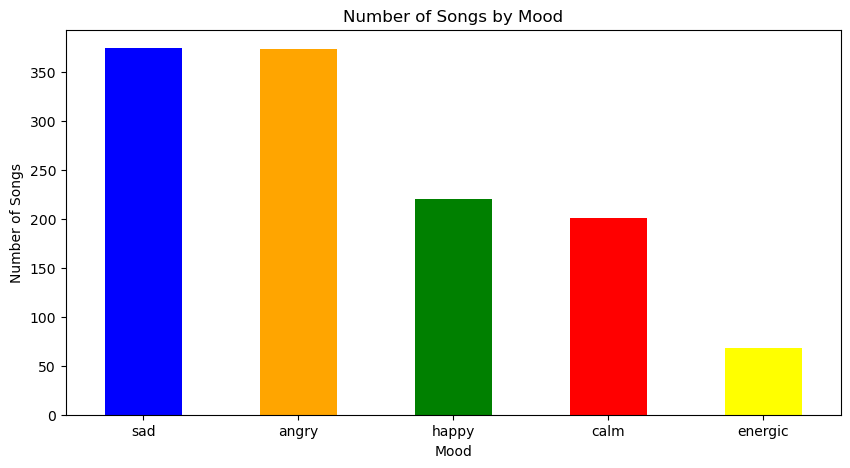

In [403]:
import matplotlib.pyplot as plt

mood_counts = df[['calm', 'energic', 'sad', 'happy', 'angry']].sum().sort_values(ascending=False)

# Now we plot the bar chart
plt.figure(figsize=(10,5))
mood_counts.plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'yellow'])
plt.title('Number of Songs by Mood')
plt.xlabel('Mood')
plt.ylabel('Number of Songs')
plt.xticks(rotation=0)
plt.show()


In [62]:
# Let's recheck the count for the 'calm' category to confirm its accuracy.
kolom_count = df['happy'].sum()
kolom_count


346

## PEMBUATAN MODEL SISTEM

In [45]:
import pickle
import pandas as pd 
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

def recommend_by_mood_and_age(mood, age_group, df, features):
    # Menentukan kolom mood berdasarkan input
    mood_column = mood.lower()

    # Mendapatkan lagu-lagu yang sesuai dengan mood dan kelompok umur yang diminta
    filtered_songs = df[(df[mood_column] == 1) & (df['umur'] == age_group)]

    if not filtered_songs.empty:
        # Menghitung kesamaan antara lagu-lagu menggunakan content-based filtering
        # Fitur normalisasi untuk menghitung similarity
        scaler = StandardScaler()
        song_features = scaler.fit_transform(filtered_songs[features])

        # Menghitung similarity matrix
        similarity_matrix = cosine_similarity(song_features)
        
        # Asumsikan lagu pertama sebagai lagu yang ingin dicari kesamaannya
        # Ini bisa diganti dengan sistem yang lebih kompleks untuk menentukan referensi
        reference_song_index = 0
        song_similarity = similarity_matrix[reference_song_index]

        # Mendapatkan indeks lagu yang paling mirip
        similar_songs_idx = np.argsort(-song_similarity)

        # Mengambil sampel acak dari lagu-lagu yang mirip
        num_songs_to_recommend = min(5, len(filtered_songs))
        recommended_songs = filtered_songs.iloc[similar_songs_idx[:num_songs_to_recommend]]['track_name'].tolist()

        # Menyimpan hasil ke dalam file pickle
        with open('rekomendasi_mood_age.pkl', 'wb') as f:
            pickle.dump(recommended_songs, f)

        return recommended_songs
    else:
        return "Tidak ditemukan lagu dengan mood dan kelompok umur tersebut dalam dataset."

# Contoh fitur yang akan digunakan untuk menghitung kemiripan
features = ['danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'valence',  'speechiness']

# Misalkan kita memiliki DataFrame 'df' yang berisi data lagu, termasuk fitur-fitur di atas
# Karena kita tidak memiliki DataFrame nyata, ini hanya sebagai placeholder
# df = pd.read_csv('path_to_your_dataset.csv')

# Contoh penggunaan fungsi yang diperbarui
mood_example = "happy"
age_group_example = "remaja"  # Contoh kelompok umur
recommendations_mood_age = recommend_by_mood_and_age(mood_example, age_group_example, df, features)
print(recommendations_mood_age)


['Jatuh Hati', 'Runtuh', 'Tak Ingin Usai', 'Kembali Pulang', 'Tak Kan Hilang']


In [404]:
# Assigning a different color to each age group
colors = ['blue', 'green', 'red', 'purple', 'yellow', 'orange', 'pink', 'grey', 'brown', 'cyan']

# Ensure there are enough colors for each age group
if len(age_counts) > len(colors):
    colors = colors * (len(age_counts) // len(colors) + 1)

# Plotting the bar chart with different colors for each age group
plt.figure(figsize=(10,5))
age_counts.plot(kind='bar', color=colors[:len(age_counts)])
plt.title('Number of Songs by Age')
plt.xlabel('Age')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()


NameError: name 'age_counts' is not defined

In [405]:
import pandas as pd

# Ganti 'path_to_your_file.xlsx' dengan path file Excel Anda
data = pd.read_excel('revisihasilfinal.xlsx')
mood_columns = ['calm', 'energic', 'sad', 'happy', 'angry']
rows_without_1_in_mood = data[~data[mood_columns].isin([1]).any(axis=1)]

print("Jumlah baris tanpa nilai 1 pada kelima kolom mood:", len(rows_without_1_in_mood))


Jumlah baris tanpa nilai 1 pada kelima kolom mood: 346
